In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from google.colab import drive
warnings.filterwarnings('ignore')

# 데이터 전처리

In [2]:
df = pd.read_excel("/content/drive/MyDrive/코호트/Online Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Null값 확인 -> 약 25%가 Nan값으로 채워져있기 때문에 해당 컬럼 삭제
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
# Description이 Nan인 경우 UnitPrice도 0값임 따라서 해당 컬럼도 삭제
df[df.Description.isna() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
df.dropna(subset=['CustomerID'],axis=0,inplace=True)

In [20]:
# 중복값 확인
print("중복 값의 수:", len(df[df.duplicated() == True]))
print()
df[df.duplicated() == True]

중복 값의 수: 5225



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [21]:
# 중복값 제거
df.drop_duplicates(inplace = True)

# EDA

## Top10 국가

In [32]:
df.Country.value_counts().values

array([356728,   9480,   8475,   7475,   2528,   2371,   2069,   1877,
         1471,   1258,   1086,    803,    757,    695,    611,    461,
          401,    389,    358,    341,    291,    247,    241,    229,
          182,    151,    146,    127,     68,     61,     58,     45,
           35,     32,     30,     17,     10])

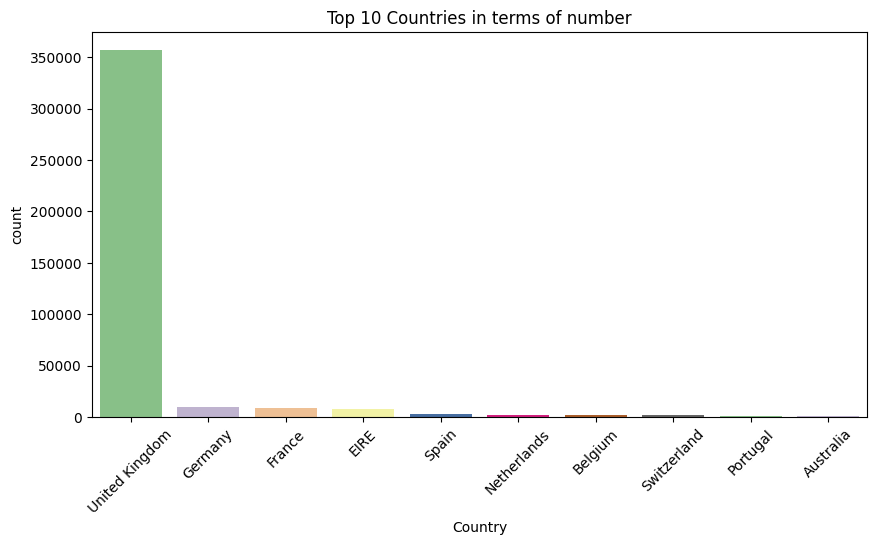

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index[:10], palette='Accent')
plt.xticks(rotation=45)
plt.title('Top 10 Countries in terms of number')
plt.show()


영국이 90%이상을 차지하는 것을 보여주고, 다른 나라는 3%에도 미치지 않는다. 따라서 영국만 추출하여 분석할 예정이다.

## 고객과 상품

In [39]:
# 총 제품 수(Stock code), 거래 수(InvoiceNo), 고객 수(CustomerID) 파악

pd.DataFrame([{'Products': len(df['StockCode'].value_counts()),
               'Transactions': len(df['InvoiceNo'].value_counts()),
               'Customers': 4372,
              }], index = ['Quantity'])

,Products,Transactions,Customers
Quantity,3684,22190,4372


약 4300명의 고객, 3700개의 제품, 22000건의 거래 건을 확인하였다.

In [40]:
# 모든 거래에서 구매한 제품의 수를 확인

temp=df.groupby('InvoiceNo',as_index=False).agg(
    {'Description':np.count_nonzero}).sort_values(by='Description',ascending=False)
temp.columns=['InvoiceNo','Total_Orders']
temp

,InvoiceNo,Total_Orders
16242,576339,542
17524,579196,533
18165,580727,529
17128,578270,442
15081,573576,435
...,...,...
19716,C550029,1
16273,576385,1
19719,C550147,1
19720,C550165,1


Insights
1. 하나의 제품만 구매한 고객이 있는가 하면, 여러 번 주문한 고객이 있음
2. 접두사 C가 붙은 경우, 취소된 거래를 나타냄

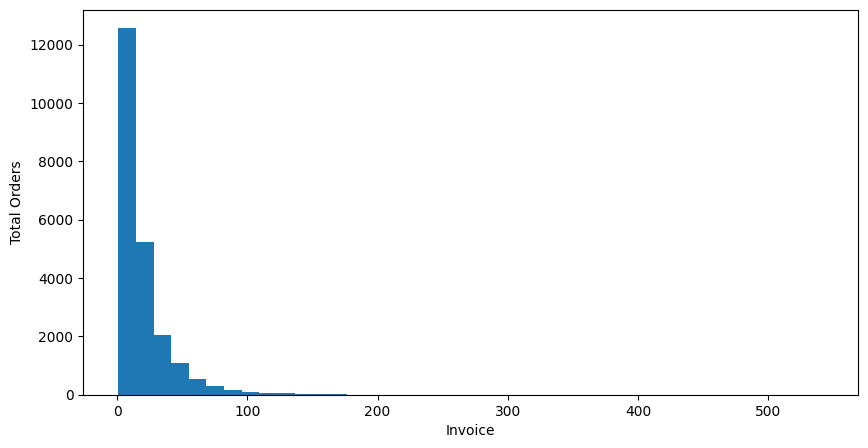

In [41]:
## Invoice별 주문량
plt.figure(figsize=(10,5))
plt.hist(temp.Total_Orders,bins=40)
plt.xlabel('Invoice')
plt.ylabel('Total Orders')
plt.show()

In [42]:
temp['Canceled'] = [str(np.where(str.startswith(str(k),'C')==False,'Not Cancelled','Cancelled')) for k in temp.InvoiceNo]

In [44]:
temp.Canceled.value_counts()

Not Cancelled    18536
Cancelled         3654
Name: Canceled, dtype: int64

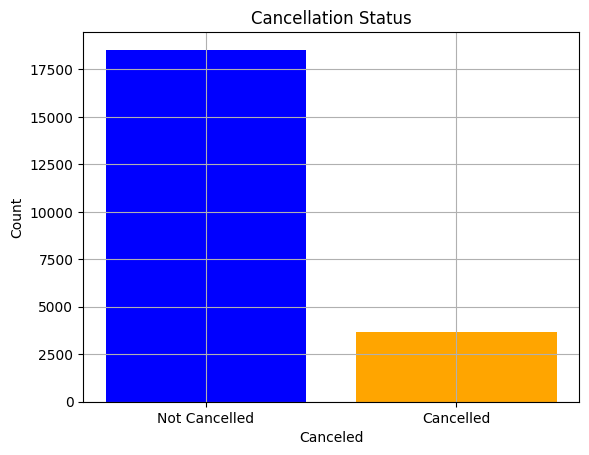

In [55]:
plt.bar(temp.Canceled.value_counts().index, temp.Canceled.value_counts().values, color=['blue', 'orange'])
plt.xlabel('Canceled')
plt.ylabel('Count')
plt.title('Cancellation Status')
plt.grid()
plt.show()

In [58]:
print('약 {}% 의 주문이 취소됨'.format(round(temp.Canceled.value_counts()[1]*100/len(temp),2)))

약 16.47% 의 주문이 취소됨


## Stock Code

In [59]:
temp=pd.DataFrame(data={'StockCode':df.StockCode,'Description':df.Description,'dtype':[str.isidentifier(str(k)) for k in df.StockCode]})
temp[temp.dtype==True][:5]

,StockCode,Description,dtype
45,POST,POSTAGE,True
141,D,Discount,True
386,POST,POSTAGE,True
1123,POST,POSTAGE,True
1423,C2,CARRIAGE,True


In [60]:
temp[temp.dtype==True].StockCode.unique()

array(['POST', 'D', 'C2', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

In [61]:
codes=['POST', 'D', 'C2', 'M', 'PADS', 'DOT', 'CRUK']
temp=temp[temp.StockCode.isin(codes)]
for code in codes:
    print("{:<15} -> {:<30}".format(code,temp[df.StockCode==code].Description.unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


In [68]:
temp.StockCode.value_counts()

POST    1196
M        460
C2       134
D         77
DOT       16
CRUK      16
PADS       4
Name: StockCode, dtype: int64

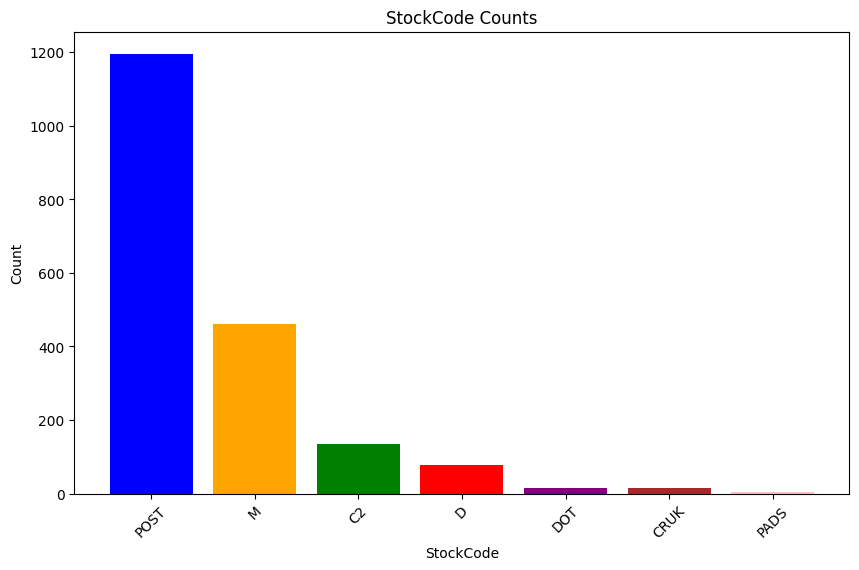

In [69]:
import matplotlib.pyplot as plt

# 결과 데이터
result = temp.StockCode.value_counts()

# 색상 설정
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(result.index, result.values, color=colors)
plt.xlabel('StockCode')
plt.ylabel('Count')
plt.title('StockCode Counts')
plt.xticks(rotation=45)
plt.show()


## 총 구매금액

In [70]:
df['Amount']=df.UnitPrice*df.Quantity
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [74]:
temp=df[(df.Quantity>0) & (df.StockCode.isin(codes).values==False)].groupby(
    'InvoiceNo',as_index=False).agg(
    {'Quantity':sum,'Amount':sum})
temp.head()

,InvoiceNo,Quantity,Amount
0,536365,40,139.12
1,536366,12,22.20
2,536367,83,278.73
3,536368,15,70.05
4,536369,3,17.85


<Axes: xlabel='Amount'>

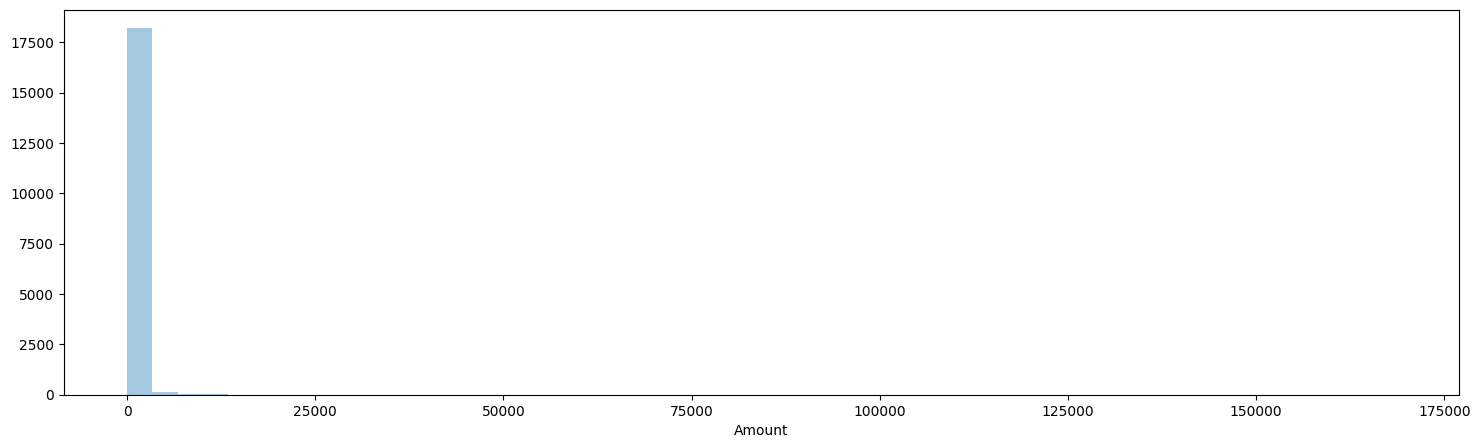

In [78]:
plt.figure(figsize=[18,5])
sns.distplot(temp[temp!=0].Amount,kde=False,)

최고 주문수는 12500

In [79]:
bins = [-1,50,100,200,500,1000,5000,np.inf]
names = ['<50','50-100','100-200','200-500','500-1000','1000-5000','5000+']
temp['amount_cat']=pd.cut(temp['Amount'],bins,labels=names)

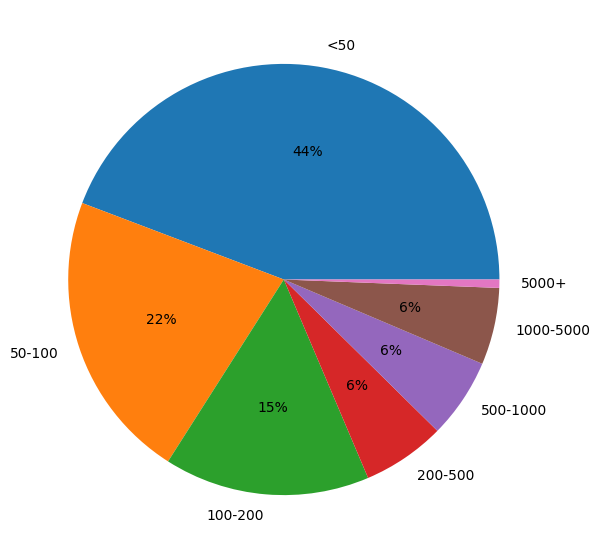

In [81]:
plt.figure(figsize=(7,7))
plt.pie(temp[temp.Amount>0].amount_cat.value_counts().values,labels=names,autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
plt.show()

대부분 낮은 금액의 구매로 이루어졌다.

In [82]:
temp=df[(df.Quantity>0) & (df.StockCode.isin(codes).values==False)].groupby(
    'Country',as_index=False).agg(
    {'Quantity':sum,'Amount':sum})
temp.head()

,Country,Quantity,Amount
0,Australia,84198,138103.81
1,Austria,4844,8742.68
2,Bahrain,260,548.40
3,Belgium,22962,36927.34
4,Brazil,356,1143.60


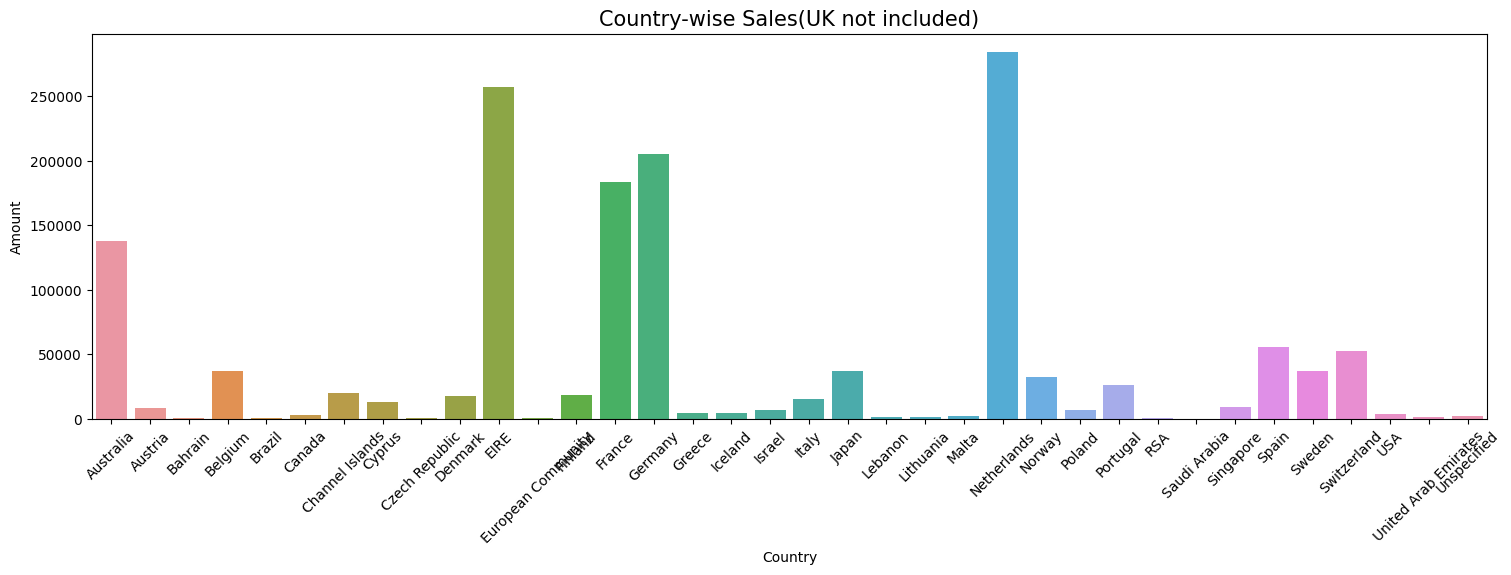

In [83]:
plt.figure(figsize=(18,5))
sns.barplot(x='Country',y='Amount',data=temp[temp.Country!='United Kingdom'],)
plt.xticks(rotation=45)
plt.title('Country-wise Sales(UK not included)',size=15)
plt.show()

# 코호트 분석

코호트 분석이란,

코호트는 시간의 흐름에 따라 유사한 특성을 가진 사용자들의 집합이다. 코호트 분석은 사용자를 상호 배타적인 그룹으로 그룹화하고 그들의 행동은 시간의 경과에 따라 측정된다.

제품과 고객 라이프사이클에 대한 정보를 제공할 수 있다.

코호트 분석은 고객들을 기준으로 초기 달(기준 달)에 얼마나 많은 고객이 구매를 했는지를 파악하고, 이후의 각 달에 해당 기준 달과 비교하여 추가 구매를 하는 고객 수를 살펴본다. 따라서 각 코호트 인덱스(월)는 해당 월에 기준 달로부터 얼마나 많은 고객이 추가 구매를 했는지를 나타낸다.

코호트 분석의 기법에는 총 3가지가 있다.
1. Time cohorts: 시간의 흐름을 기준으로, 구매 행동에 따라 고객 세그먼트를 한다.
2. Behaviour cohorts: 고객이 등록한 제품 또는 서비스를 기준으로 고객 세그먼트를 한다.
3. Size cohorts: 기업의 제품 또는 다양한 크기의 서비스를 구매하는 고객을 말한다. 이 분류는 특정 기간 동안의 지출 금액을 기반으로 할 수 있다.

## Time cohorts

In [84]:
import datetime as dt

In [85]:
# Start and end dates:
print('Start date: {}'.format(df.InvoiceDate.min()))
print('End date: {}'.format(df.InvoiceDate.max()))

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


In [105]:
cohort_data = df[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','Amount','CustomerID','Country']]

In [106]:
cohort_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Amount         0
CustomerID     0
Country        0
dtype: int64

In [107]:
cohort_data.InvoiceDate=pd.to_datetime(cohort_data.InvoiceDate).apply(lambda x:dt.datetime(x.year,x.month,x.day))

In [108]:
cohort_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,20.34,17850.0,United Kingdom


In [109]:
grouping=cohort_data.groupby('CustomerID',as_index=False)['InvoiceDate'].min()
grouping.columns=['CustomerID','CohortMonth']
grouping

,CustomerID,CohortMonth
0,12346.0,2011-01-18
1,12347.0,2010-12-07
2,12348.0,2010-12-16
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4367,18280.0,2011-03-07
4368,18281.0,2011-06-12
4369,18282.0,2011-08-05
4370,18283.0,2011-01-06


In [110]:
grouping['CohortMonth'].apply(lambda x:dt.datetime(x.year,x.month,1))

0      2011-01-01
1      2010-12-01
2      2010-12-01
3      2011-11-01
4      2011-02-01
          ...    
4367   2011-03-01
4368   2011-06-01
4369   2011-08-01
4370   2011-01-01
4371   2011-05-01
Name: CohortMonth, Length: 4372, dtype: datetime64[ns]

In [111]:
cohort_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,10.20,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12.60,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,16.60,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,16.60,12680.0,France


In [112]:
grouping=cohort_data.groupby('CustomerID',as_index=False)['InvoiceDate'].min() #고객별 첫구매컬럼 도출
grouping.columns=['CustomerID','CohortMonth']
grouping['CohortMonth']=grouping['CohortMonth'].apply(lambda x:dt.datetime(x.year,x.month,1)) #전부다 1일로 변경
grouping.columns=['CustomerID','CohortMonth']
cohort_data=cohort_data.merge(grouping,on='CustomerID',how='left')
cohort_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,CohortMonth
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,10.20,12680.0,France,2011-08-01
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12.60,12680.0,France,2011-08-01
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,16.60,12680.0,France,2011-08-01
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,16.60,12680.0,France,2011-08-01
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,14.85,12680.0,France,2011-08-01


In [113]:
pd.Series((cohort_data.InvoiceDate-cohort_data.CohortMonth)/30).dt.days.astype('int')

0         0
1         0
2         0
3         0
4         0
         ..
401599    4
401600    4
401601    4
401602    4
401603    4
Length: 401604, dtype: int64

In [114]:
#'InvoiceDate'와 'CohortMonth' 열 사이의 날짜 차이를 계산
# 날짜 차이를 30으로 나누어 월 단위로 변환
# dt.days를 통해 소수점을 버리고 정수형 데이터로 반환
# 정수형 데이터로 형변환
# 0은 첫 번째 달(기준 달)을 의미
cohort_data['CohortIndex']=pd.Series((cohort_data.InvoiceDate-cohort_data.CohortMonth)/30).dt.days.astype('int')

In [116]:
grouping=cohort_data.groupby(['CohortMonth','CohortIndex'],as_index=False).agg({'CustomerID':'nunique'})
cohort_counts=grouping.pivot_table(columns='CohortIndex',index='CohortMonth')
cohort_counts

CustomerID                                                   \
CohortIndex         0      1      2      3      4      5      6      7    
CohortMonth                                                               
2010-12-01       948.0  341.0  339.0  355.0  353.0  367.0  349.0  340.0   
2011-01-01       403.0  122.0  117.0  102.0  136.0  122.0  111.0  104.0   
2011-02-01       380.0   95.0   72.0  103.0  102.0   92.0   95.0  100.0   
2011-03-01       422.0  100.0  108.0   93.0   99.0   78.0  106.0  108.0   
2011-04-01       299.0   67.0   67.0   65.0   60.0   63.0   70.0   77.0   
2011-05-01       270.0   73.0   50.0   46.0   51.0   78.0   69.0   43.0   
2011-06-01       235.0   46.0   44.0   59.0   58.0   77.0   35.0    NaN   
2011-07-01       187.0   43.0   38.0   46.0   49.0   29.0    NaN    NaN   
2011-08-01       162.0   48.0   37.0   45.0   25.0    NaN    NaN    NaN   
2011-09-01       298.0   87.0   93.0   42.0    NaN    NaN    NaN    NaN   
2011-10-01       343.0   97.0   53.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01       321.0   43.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                
CohortIndex     8      9      10     11     12  
CohortMonth                                     
2010-12-01   330.0  354.0  355.0  467.0  334.0  
2011-01-01   122.0  144.0  154.0   89.0    NaN  
2011-02-01   103.0  113.0   51.0    NaN    NaN  
2011-03-01   125.0   56.0    NaN    NaN    NaN  
2011-04-01    35.0    NaN    NaN    NaN    NaN  
2011-05-01     NaN    NaN    NaN    NaN    NaN  
2011-06-01     NaN    NaN    NaN    NaN    NaN  
2011-07-01     NaN    NaN    NaN    NaN    NaN  
2011-08-01     NaN    NaN    NaN    NaN    NaN  
2011-09-01     NaN    NaN    NaN    NaN    NaN  
2011-10-01     NaN    NaN    NaN    NaN    NaN  
2011-11-01     NaN    NaN    NaN    NaN    NaN  
2011-12-01     NaN    NaN    NaN    NaN    NaN

표 해석

* CohortMonth 2010-12-01(기준 달)
-> CohortIndex 0의 경우 948명의 고유 고객이 거래했음
-> 코호트 인덱스 1 (기준 달로부터 첫 번째 달 뒤, 2011년 1월): 기준 달 이후 첫 번째 달인 2011년 1월에는 341명의 고객이 추가 구매함.
-> 코호트 인덱스 2 (기준 달로부터 두 번째 달 뒤, 2011년 2월): 기준 달 이후 두 번째 달인 2011년 2월에는 339명의 고객이 추가 구매함.
-> ...
-> 코호트 인덱스 12 (기준 달로부터 열두 번째 달 뒤, 2011년 12월): 기준 달 이후 열한 번째 달인 2011년 11월에는 467명의 고객이 추가 구매함.


전체 고객 중 활성 고객의 비율로 정의되는 유지율 계산

첫 번째 거래는 CohortIndex 0에 해당하기 때문에, 데이터의 첫번째 열을 코호트 크기로 사용

코호트 분석에서 'Retention'은 특정 기간에 첫 번째 구매를 한 고객들 중에서 그 이후에도 지속적으로 구매를 이어나가는 고객들의 비율을 나타냄. 쉽게 말해, 초기에 구매한 고객들 중에서 재구매를 하는 고객들의 비율을 의미함.

In [119]:
cohort_sizes = cohort_counts.iloc[:,0]

# cohort_counts 테이블의 모든 값을 cohort_sizes로 나눈다.
retention=cohort_counts.divide(cohort_sizes, axis=0)
retention=retention.round(3)*100
retention

CustomerID                                                        \
CohortIndex         0     1     2     3     4     5     6     7     8     9    
CohortMonth                                                                    
2010-12-01       100.0  36.0  35.8  37.4  37.2  38.7  36.8  35.9  34.8  37.3   
2011-01-01       100.0  30.3  29.0  25.3  33.7  30.3  27.5  25.8  30.3  35.7   
2011-02-01       100.0  25.0  18.9  27.1  26.8  24.2  25.0  26.3  27.1  29.7   
2011-03-01       100.0  23.7  25.6  22.0  23.5  18.5  25.1  25.6  29.6  13.3   
2011-04-01       100.0  22.4  22.4  21.7  20.1  21.1  23.4  25.8  11.7   NaN   
2011-05-01       100.0  27.0  18.5  17.0  18.9  28.9  25.6  15.9   NaN   NaN   
2011-06-01       100.0  19.6  18.7  25.1  24.7  32.8  14.9   NaN   NaN   NaN   
2011-07-01       100.0  23.0  20.3  24.6  26.2  15.5   NaN   NaN   NaN   NaN   
2011-08-01       100.0  29.6  22.8  27.8  15.4   NaN   NaN   NaN   NaN   NaN   
2011-09-01       100.0  29.2  31.2  14.1   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01       100.0  28.3  15.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-01       100.0  13.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12-01       100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                               
CohortIndex    10    11    12  
CohortMonth                    
2010-12-01   37.4  49.3  35.2  
2011-01-01   38.2  22.1   NaN  
2011-02-01   13.4   NaN   NaN  
2011-03-01    NaN   NaN   NaN  
2011-04-01    NaN   NaN   NaN  
2011-05-01    NaN   NaN   NaN  
2011-06-01    NaN   NaN   NaN  
2011-07-01    NaN   NaN   NaN  
2011-08-01    NaN   NaN   NaN  
2011-09-01    NaN   NaN   NaN  
2011-10-01    NaN   NaN   NaN  
2011-11-01    NaN   NaN   NaN  
2011-12-01    NaN   NaN   NaN

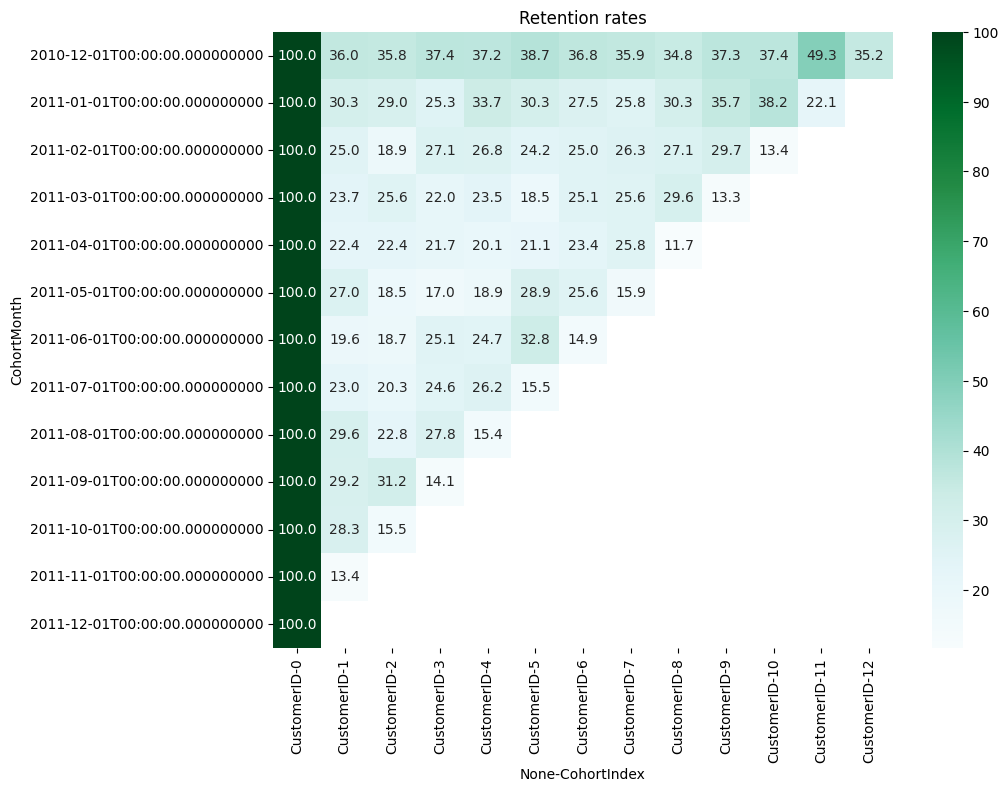

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(retention,annot=True,fmt = '0.1f',cmap ='BuGn')
plt.title('Retention rates')
plt.show()

# RFM 분류

RFM이란,

RFM분석은 최근 거래(Recency), 작년에 수행한 거래 수(Frequency), 거래의 금전적 가치(Monetary)를 기준으로 각 고객의 가중치를 생성하여 할당한 후에, 고객별로 세그먼트를 하는 방식이다.

RFM분석은 가장 최근 고객은 누구였는지, 누가 우리가게에서 물건을 몇 번이나 구입했는지, 그리고 누구의 거래 총 가치는 얼마인지 등 이 모든 정보를 통해 고객이 기업에 얼마나 기여하는지 이해하는데 사용된다.

RFM값을 얻은 후 일반적인 방법은 각 메트릭에 사분위수를 만들고 필요한 순서를 할당하는 것이다.

Amount 컬럼을 사용하여 각 거래의 금전적 가치를 파악한다.

In [122]:
print("The Date Range\n")
start_date=cohort_data.InvoiceDate.max()-dt.timedelta(days=365)
print('Start Date: ',start_date)
print('End Date: ',cohort_data.InvoiceDate.max())

The Date Range

Start Date:  2010-12-09 00:00:00
End Date:  2011-12-09 00:00:00


In [123]:
data_rfm=cohort_data[(cohort_data.InvoiceDate>=start_date) & (cohort_data.Amount>0)]
data_rfm.reset_index(drop=True,inplace=True)
data_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,CohortMonth,CohortIndex
0,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09,3.95,47.4,14243.0,United Kingdom,2010-12-01,0
1,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09,4.65,37.2,14243.0,United Kingdom,2010-12-01,0
2,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09,2.55,15.3,14243.0,United Kingdom,2010-12-01,0
3,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09,7.95,31.8,14243.0,United Kingdom,2010-12-01,0
4,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09,7.95,15.9,14243.0,United Kingdom,2010-12-01,0


이제, RFM분석을 위해 분석을 수행하는 날짜인 'snapshot date'정의를 해야한다. 여기서는 스냅샷 날짜를 데이터에서 가장 높은 날짜+1로 정의했다.

스냅샷은 RFM메트릭을 계산하는 기준 시점이다.

In [125]:
snapshot_date=data_rfm.InvoiceDate.max()+dt.timedelta(days=1) #The date at which the RFM Analysis should be taking place
print('Snapshot Date: ',snapshot_date)

Snapshot Date:  2011-12-10 00:00:00


In [126]:
# Aggregate data on a customer level

data=data_rfm.groupby('CustomerID',as_index=False).agg({'InvoiceDate':lambda x:(snapshot_date-x.max()).days,
                                        'InvoiceNo':'count',
                                        'Amount':'sum'}).rename(columns = {'InvoiceDate': 'Recency',
                                                                                   'InvoiceNo': 'Frequency',
                                                                                   'Amount': 'MonetaryValue'})
data.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,3,151,3598.21
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40


Recency 메트릭의 경우 가장 최근성 값이 작은 고객에게 가장 높은 4가 할당된다.

Frequency 및 금액 메트릭의 경우 가장 높은 4가 각각 상위 25% 빈도 및 금액 값을 가진 고객에게 할당된다.

메트릭을 사분위수로 나눈 후 메트릭을 단일 열과 같은 문자로 조합하여 고객을 위한 RFM 값 클래스를 생성한다.

R : Recency(최근 주문일로부터의 경과 일수) → 숫자가 작을수록 좋음

F : Frequency(최근 ○개월간 주문 횟수) → 숫자가 클수록 좋음

M : Monetary Value(최근 ○개월간 주문 금액) → 숫자가 클수록 좋음

In [127]:
r_quartiles=pd.qcut(data.Recency,4,labels=[4,3,2,1])
f_quartiles=pd.qcut(data.Frequency,4,labels=[1,2,3,4])
m_quartiles=pd.qcut(data.MonetaryValue,4,labels=[1,2,3,4])

data['R']=r_quartiles
data['F']=f_quartiles
data['M']=m_quartiles

In [128]:
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,326,1,77183.60,1,1,4
1,12347.0,3,151,3598.21,4,4,4
2,12348.0,76,31,1797.24,2,2,4
3,12349.0,19,73,1757.55,3,3,4
4,12350.0,311,17,334.40,1,1,2


In [129]:
data['RFM_Segment']=[str(data.R[i])+str(data.F[i])+str(data.M[i]) for i in range(len(data))]
data['RFM_Score']=data.R.astype('int')+data.F.astype('int')+data.M.astype('int')

In [131]:
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,114,6
1,12347.0,3,151,3598.21,4,4,4,444,12
2,12348.0,76,31,1797.24,2,2,4,224,8
3,12349.0,19,73,1757.55,3,3,4,334,10
4,12350.0,311,17,334.40,1,1,2,112,4


In [132]:
data.groupby('RFM_Score').agg({'Recency': 'mean',
                                'Frequency': 'mean',
                                'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           248.4       8.3         158.1   375
4           168.6      13.9         238.0   379
5           147.0      20.4         362.0   492
6            90.9      27.3         803.8   465
7            82.5      38.3         757.7   453
8            60.4      54.5         974.5   461
9            44.5      76.2        1790.6   401
10           31.9     109.0        2022.6   428
11           21.6     183.9        4004.8   383
12            7.6     363.9        9161.2   437

예상대로 RFM 점수가 가장 낮은 고객은 최근성이 가장 높고, 빈도 및 금전적 가치가 가장 낮다.

마지막으로 데이터에서 범주를 수동으로 생성하여 RFM_Score 3-12이 점수 범위 내에서 세그먼트를 생성할 수 있다.

다음과 같이 범주를 정의할 수 있다.

1. RFM_Score가 9 이상인 고객은 '상위' 범주
2. RFM_Score가 5~9 사이인 고객은 '중간' 범주
3. RFM_Score가 나머지인 고객은 '낮음' 범주

In [133]:
bins=[0,5,9,np.inf]
label=['Low','Middle','Top']
data['General_Segment']=pd.cut(data.RFM_Score,bins=bins,labels=label)

In [134]:
data.groupby('General_Segment').agg({'Recency':'mean',
                                    'Frequency':'mean',
                                    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               184.1      14.8         262.9  1246
Middle             70.4      48.2        1058.5  1780
Top                20.2     221.2        5130.6  1248

결과가 괜찮지만, 더 자세한 세그먼트를위해 군집화 진행

## 왜도 제거

RFM 점수에서 Kmeans 클러스터링을 위한 데이터를 준비할 것이다.

1. 변수는 대칭적으로 분포되어야 한다.
2. 변수는 평균값이 유사해야 한다.
3. 변수는 표준편차 값이 유사해야 한다.

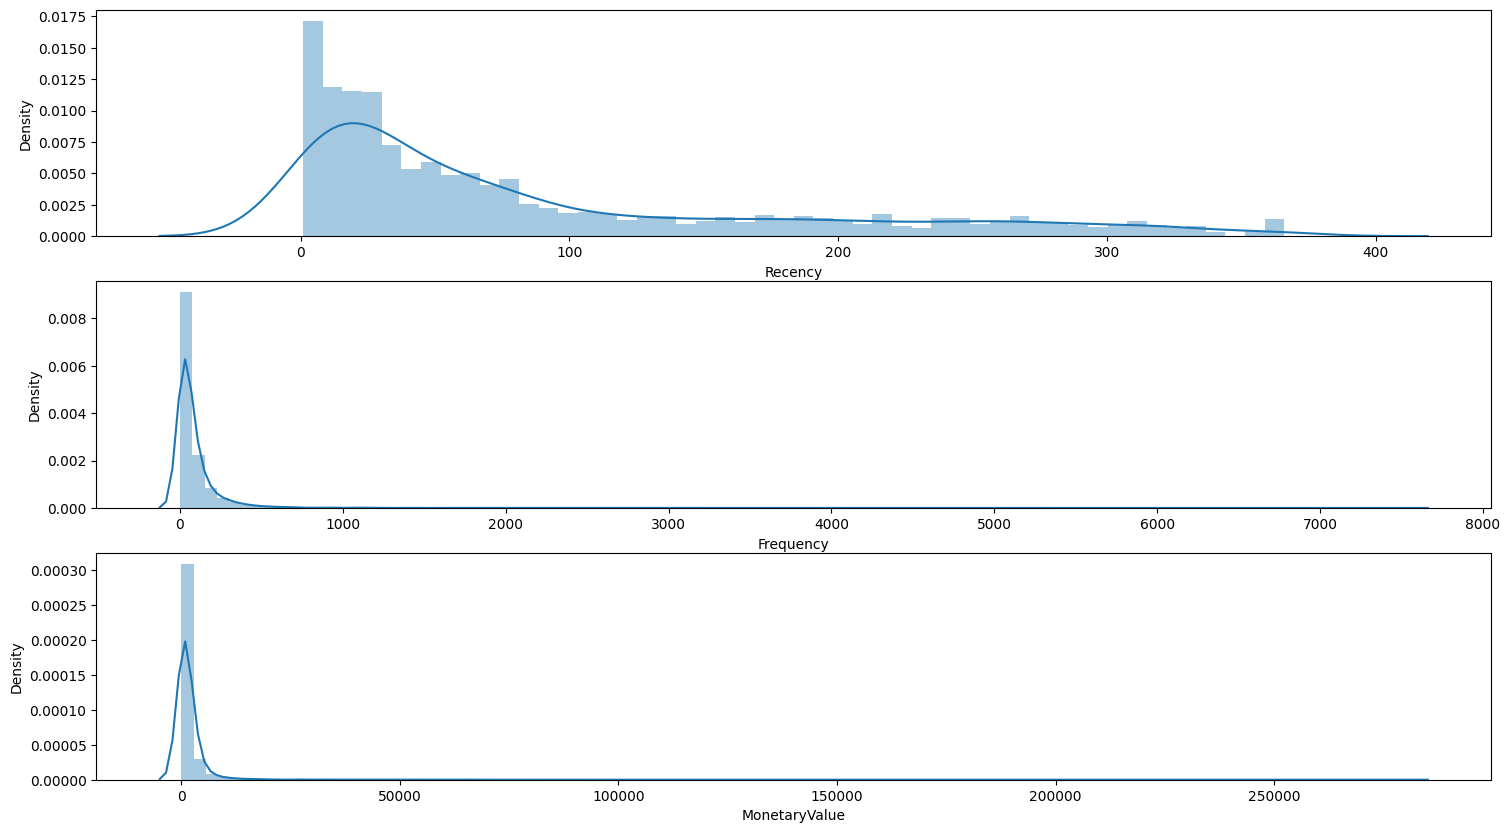

In [135]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(18,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data['Recency'],bins=50)

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'],bins=100)

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['MonetaryValue'],bins=100)

plt.show()

안타깝게도 모든 변수는 대칭이 아니다. 모두 오른쪽으로 치우쳐져있기 때문에, 왜도를 제거할 필요가 있다.

왜도는 분포의 비대칭 정도를 측정하는 지표로서, 변수의 분포가 얼마나 대칭이 아닌지를 나타낸다. 왜도는 주로 데이터의 분포를 확인하고 이상치를 탐지하거나 변수 변환을 위해 사용된다.

왜도의 값에 따라 분포의 특성을 아래와 같이 해석할 수 있다:

1. 왜도 값이 0에 가까울 경우: 데이터의 분포가 대칭에 가까움을 의미.

2. 왜도 값이 0보다 큰 양수일 경우: 오른쪽으로 치우친 분포를 가진 양의 왜도를 가짐. 오른쪽으로 꼬리가 긴 분포를 의미.

3. 왜도 값이 0보다 작은 음수일 경우: 왼쪽으로 치우친 분포를 가진 음의 왜도를 가짐. 왼쪽으로 꼬리가 긴 분포를 의미.

왜도 값을 확인하여 변수가 대칭인지 아닌지를 파악하고, 대칭이 아닌 경우 데이터 변환을 고려할 수 있다. 로그 변환, 제곱근 변환, Box-Cox 변환 등을 사용하여 데이터를 변환하면 대칭성을 높일 수 있다. 이를 통해 분석의 정확성을 높이고 모델의 성능을 개선할 수 있다.








In [136]:
data[['Recency', 'Frequency', 'MonetaryValue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4274.0,88.891671,94.733766,1.00,18.00,51.000,135.0000,366.00
Frequency,4274.0,88.967478,221.438141,1.00,17.00,40.000,97.0000,7537.00
MonetaryValue,4274.0,2015.616854,8790.275277,3.75,304.25,662.565,1642.0025,280206.02


모든 열의 최소값이 모두 양수이다. 또한 일정하지 않은 평균 및 표준편차 값을 가지고 있다.

In [137]:
rfm_data = data[['Recency','Frequency','MonetaryValue']]

In [138]:
from sklearn.preprocessing import StandardScaler

In [142]:
# 데이터 로그변환을 통한 대칭형성
data_log = np.log(rfm_data)

# 표준화
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)

# 데이터프레임 생성
data_norm = pd.DataFrame(data=data_normalized, index=rfm_data.index, columns=rfm_data.columns)

In [143]:
data_norm.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Recency,4274.0,-0.0,1.0,-2.75,-0.64,0.12,0.83,1.56
Frequency,4274.0,0.0,1.0,-2.80,-0.63,0.02,0.70,4.02
MonetaryValue,4274.0,-0.0,1.0,-4.19,-0.68,-0.06,0.66,4.75


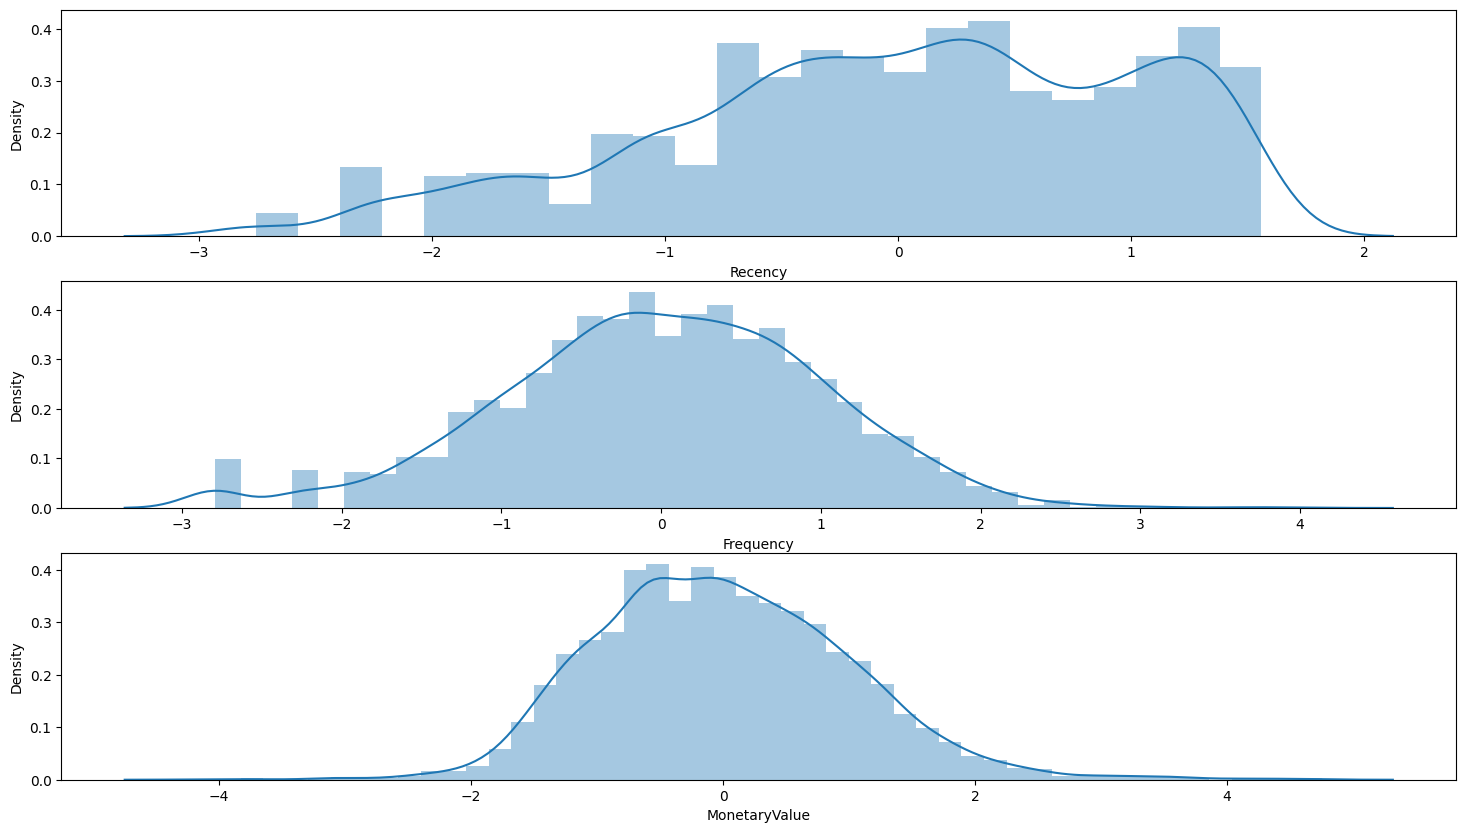

In [144]:
plt.figure(figsize=(18,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_norm['MonetaryValue'])

# Show the plot
plt.show()

왜도가 제거되었다.

## K-means Clustering

In [145]:
from sklearn.cluster import KMeans

In [146]:
sse=[]

# 최적 k값 탐색
for i in range(1,25,1):
    model=KMeans(n_clusters=i,random_state=40)
    model.fit(data_norm)
    sse.append(model.inertia_)

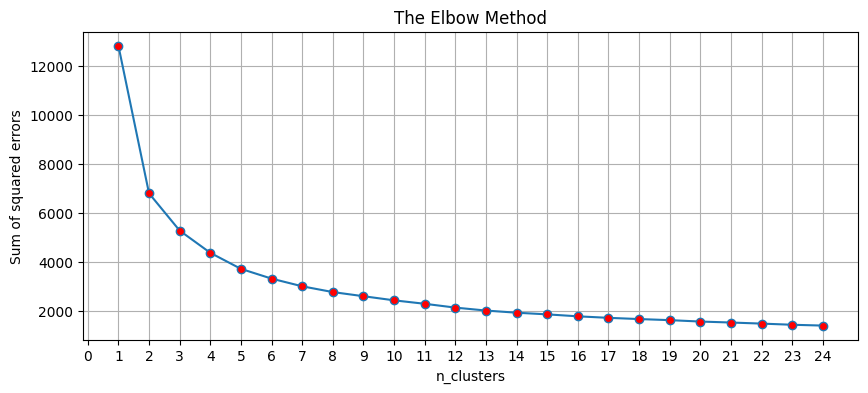

In [147]:
plt.figure(figsize=(10,4))

plt.title('The Elbow Method')
plt.xlabel('n_clusters');
plt.ylabel('Sum of squared errors')
plt.plot(range(1,25,1),sse,marker='o',markerfacecolor='r')
plt.xticks(ticks=range(0,25,1))
plt.grid()
plt.show()

3, 4, 5가 최적의 k값으로 보인다.

### K=3

In [148]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_norm)
cluster_labels = kmeans.labels_

In [150]:
data_norm_k3 = data_norm.assign(Cluster = cluster_labels) # 정규화 데이터
data_k3 = rfm_data.assign(Cluster = cluster_labels) # 원래 데이터

# 이전과 같이 각 클러스터의 평균 RFM값 및 크기 계산
summary_k3 = data_k3.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count'],}).round(0)

summary_k3

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          14.0     245.0        6118.0  1010
1          70.0      62.0        1121.0  1792
2         163.0      14.0         290.0  1472

### K=4

In [151]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_norm)
cluster_labels = kmeans.labels_

In [152]:
data_norm_k4 = data_norm.assign(Cluster = cluster_labels) #정규화 데이터
data_k4 = rfm_data.assign(Cluster = cluster_labels)#원래 데이터

# 이전과 같이 각 클러스터의 평균 RFM값 및 크기 계산
summary_k4 = data_k4.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count'],}).round(0)

summary_k4

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          13.0     277.0        7019.0   833
1         177.0      15.0         295.0  1341
2          92.0      78.0        1508.0  1237
3          20.0      38.0         587.0   863

### K=5

In [153]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(data_norm)
cluster_labels = kmeans.labels_
data_norm_k5= data_norm.assign(Cluster = cluster_labels) #정규화 데이터
data_k5= rfm_data.assign(Cluster = cluster_labels)#원래 데이터

# 이전과 같이 각 클러스터의 평균 RFM값 및 크기 계산
summary_k5 = data_k5.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count'],}).round(0)

summary_k5

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         163.0       7.0         194.0   687
1           9.0     311.0        8357.0   638
2          60.0     110.0        2066.0   989
3         160.0      31.0         528.0  1175
4          18.0      40.0         620.0   785

### Interpreting segments

In [154]:
display(summary_k3)
display(summary_k4)
display(summary_k5)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          14.0     245.0        6118.0  1010
1          70.0      62.0        1121.0  1792
2         163.0      14.0         290.0  1472

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          13.0     277.0        7019.0   833
1         177.0      15.0         295.0  1341
2          92.0      78.0        1508.0  1237
3          20.0      38.0         587.0   863

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         163.0       7.0         194.0   687
1           9.0     311.0        8357.0   638
2          60.0     110.0        2066.0   989
3         160.0      31.0         528.0  1175
4          18.0      40.0         620.0   785

In [160]:
data_norm_k3.index = data['CustomerID'].astype(int)
data_norm_k4.index = data['CustomerID'].astype(int)
data_norm_k5.index = data['CustomerID'].astype(int)

In [165]:
data_norm_k4

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,1.473568,-2.795245,3.725380,2
12347,-1.950671,1.033295,1.283489,0
12348,0.410012,-0.174870,0.730566,2
12349,-0.602512,0.478679,0.712779,2
12350,1.439164,-0.633303,-0.608895,1
...,...,...,...,...
18280,1.357236,-1.038210,-1.099586,1
18281,1.043811,-1.310378,-1.740025,1
18282,-1.234291,-0.899085,-1.110912,3


In [166]:
# RFM 값과 메트릭 이름이 기능 및 해당 값과 같이 각각 1개의 열에 저장되도록 형식에 따라 데이터를 붙인다.
data_melt_k3=pd.melt(data_norm_k3.reset_index(),id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Features',
                  value_name='Value')

data_melt_k4=pd.melt(data_norm_k4.reset_index(),id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Features',
                  value_name='Value')

data_melt_k5=pd.melt(data_norm_k5.reset_index(),id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Features',
                  value_name='Value')

data_melt_k4

,CustomerID,Cluster,Features,Value
0,12346,2,Recency,1.473568
1,12347,0,Recency,-1.950671
2,12348,2,Recency,0.410012
3,12349,2,Recency,-0.602512
4,12350,1,Recency,1.439164
...,...,...,...,...
12817,18280,1,MonetaryValue,-1.099586
12818,18281,1,MonetaryValue,-1.740025
12819,18282,3,MonetaryValue,-1.110912
12820,18283,0,MonetaryValue,0.833638


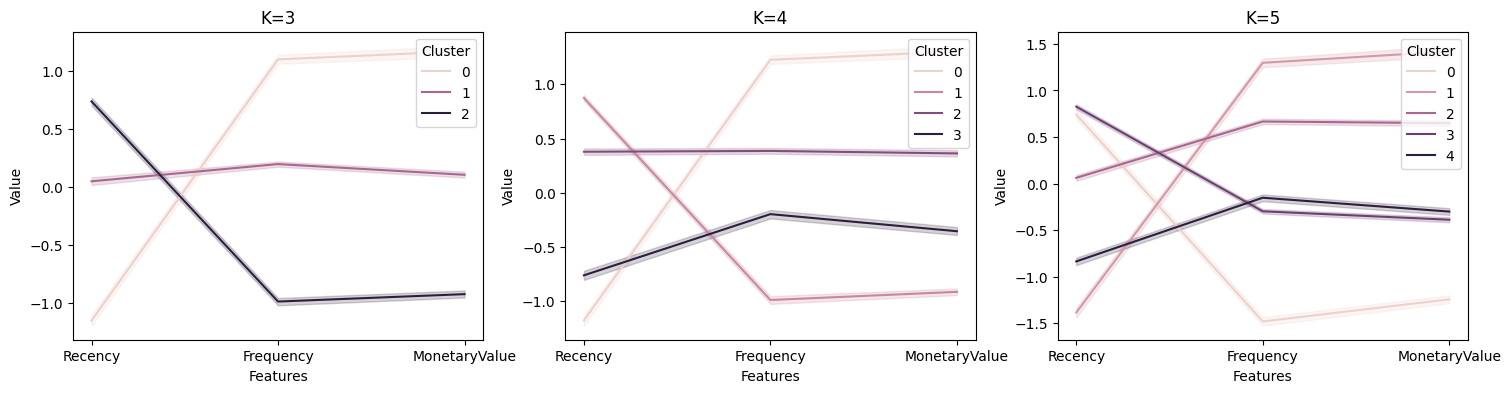

In [169]:
plt.figure(figsize=[18,4])
plt.title('Snake plot of standardized variables')
plt.subplot(1,3,1);sns.lineplot(x="Features", y="Value", hue='Cluster', data=data_melt_k3);plt.title('K=3')
plt.subplot(1,3,2);sns.lineplot(x="Features", y="Value", hue='Cluster', data=data_melt_k4);plt.title('K=4')
plt.subplot(1,3,3);sns.lineplot(x="Features", y="Value", hue='Cluster', data=data_melt_k5);plt.title('K=5')
plt.show()

위 스네이크 플롯에서, 클러스터 전체의 RFM값 분포를 확인할 수 있다.

클러스터는 서로 분리되어 있는 것처럼 보이며, K=3이 가장 적합한 클러스터라고 해석할 수 있다.

In [170]:
data_k4.index = data['CustomerID'].astype(int)
data_k4.head()

rfm_data.index = data['CustomerID'].astype(int)
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,1,77183.60
12347,3,151,3598.21
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40


In [171]:
cluster_avg = data_k4.groupby(['Cluster']).mean()
population_avg = rfm_data.head().mean()

In [172]:
display(cluster_avg)
display(population_avg)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,12.960384,276.566627,7019.213433
1,177.074571,14.650261,295.460545
2,92.378335,78.458367,1507.876365
3,20.159907,38.433372,586.658158


Recency            147.0
Frequency           54.6
MonetaryValue    16934.2
dtype: float64

In [173]:
relative_imp = cluster_avg.divide(population_avg,axis=1)
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.09,5.07,0.41
1,1.20,0.27,0.02
2,0.63,1.44,0.09
3,0.14,0.70,0.03


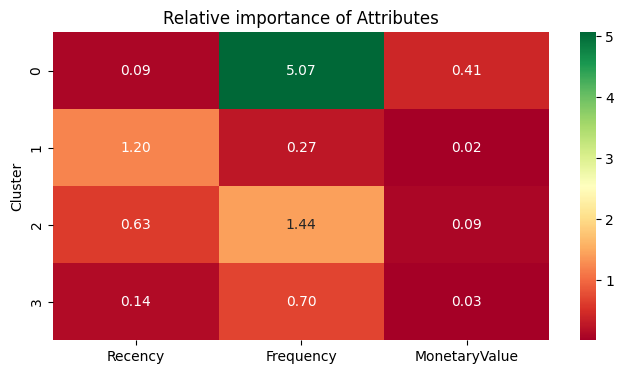

In [174]:
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

## 결론

위의 분석에서 데이터에 4개의 클러스터가 있어야 함을 알 수 있다. 비즈니스 시나리오에서 이 4개의 클러스터가 의미하는 바를 이해하려면 R, F, M의 평균값에 대해 3개 클러스터와 4개 클러스터의 클러스터링 성능을 비교하는 표를 다시 살펴봐야 합니다. 이를 바탕으로 클러스터에 '신규 고객', '잃어버린 고객', '우수 고객', '위험 고객'으로 레이블을 지정하면 좋을것 같다.

아래는 각 세그먼트에 대한 RFM해석과 해당 고객 세그먼트에 대한 마케팅 전략을 설계할 때 기업이 고려해야할 사항을 제공하는 표이다.

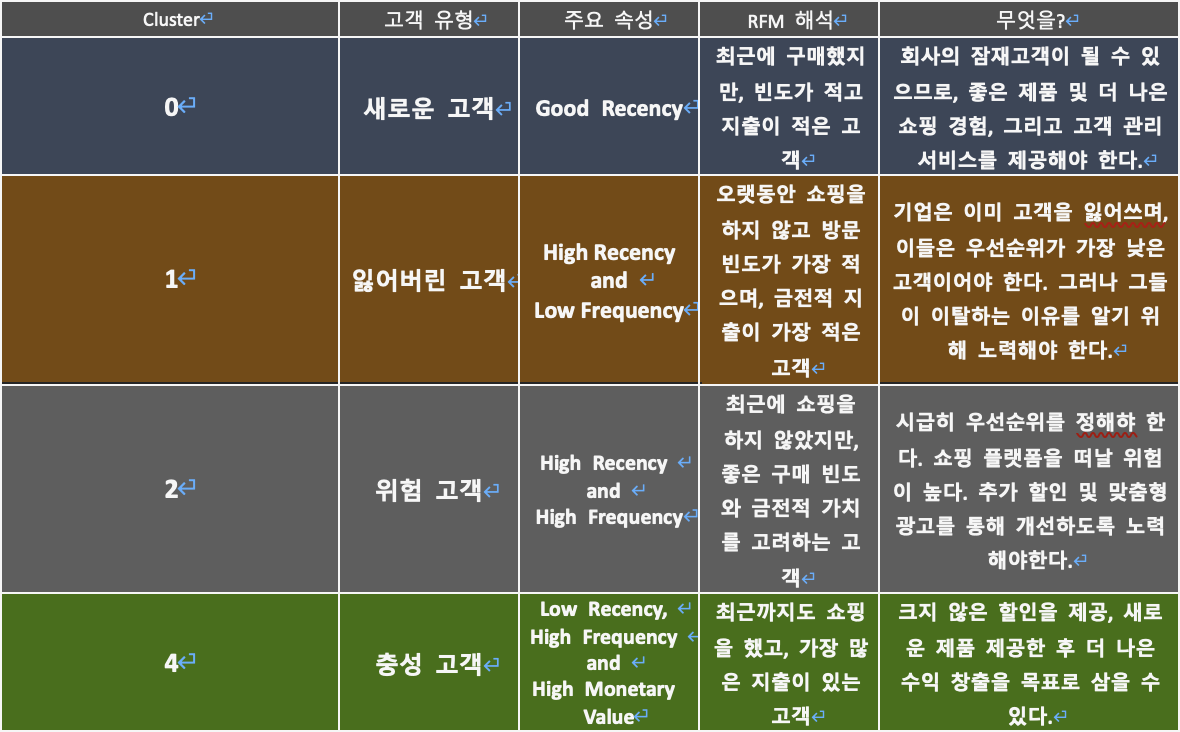

# 참고 레퍼런스

https://velog.io/@yooseungkim/Product-%EC%9A%B0%EB%A6%AC-%EA%B3%A0%EA%B0%9D%EB%93%A4%EC%9D%80-%EC%96%B8%EC%A0%9C-%EC%96%BC%EB%A7%88%EB%82%98-%EC%9E%90%EC%A3%BC-%EC%96%BC%EB%A7%8C%ED%81%BC-%EA%B5%AC%EB%A7%A4%ED%95%A0%EA%B9%8C

https://hevodata.com/learn/marketing-rfm-analysis/

https://stelch.tistory.com/pages/CRM-RFM-%EA%B3%A0%EA%B0%9D%EA%B0%80%EC%B9%98%EB%B6%84%EC%84%9D-feat-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%99%9C%EC%9A%A9

https://repository.pknu.ac.kr:8443/bitstream/2021.oak/10695/2/%EB%91%90%20%EA%B8%B0%EA%B0%84%20RFM%EC%9D%84%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20%EC%9D%B8%ED%84%B0%EB%84%B7%20%EC%87%BC%ED%95%91%EB%AA%B0%EC%9D%98%20%EA%B3%A0%EA%B0%9D%EC%84%B8%EB%B6%84%ED%99%94.pdf
